<a href="https://colab.research.google.com/github/Ramil-cyber/Ramil-Cloud-Hosted-Notebook-Data-Manipulation/blob/main/Ramil_IDS_706_Cloud_Hosted_Notebook_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import os

# Data Load and Overview

In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/Ramil-cyber/Ramil-Cloud-Hosted-Notebook-Data-Manipulation/refs/heads/main/data/world_bank_dataset.csv"
)

In [3]:
data.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


**Dataset has 200 samples and 8 attributes.**

**There are no missing samples in dataset.**

**There is only one categoric attributes and other attributes are numeric.**

# EDA

<Axes: xlabel='Population', ylabel='Life Expectancy'>

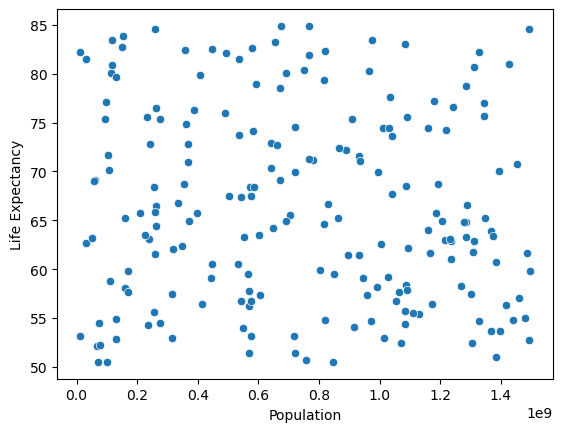

In [5]:
sns.scatterplot(data=data, x="Population", y="Life Expectancy")

<Axes: xlabel='Population', ylabel='Life Expectancy'>

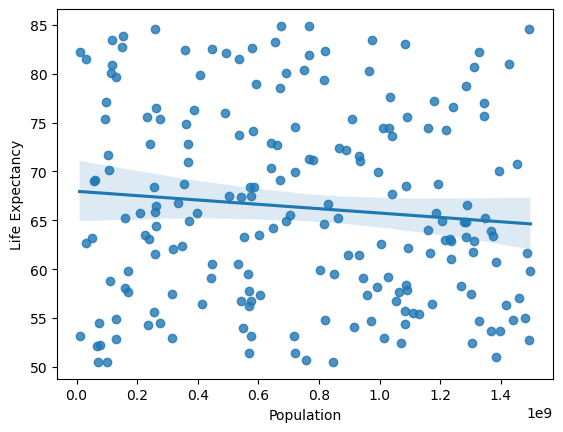

In [6]:
sns.regplot(data=data, x="Population", y="Life Expectancy")

**There seems to be no correlation between population and life expectancy.**

<Axes: xlabel='Population', ylabel='GDP (USD)'>

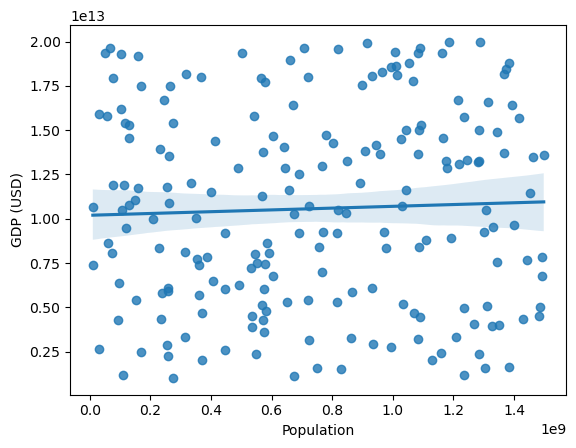

In [7]:
sns.regplot(data=data, x="Population", y="GDP (USD)")

**There seems to be no correlation between population and GDP.**

<Axes: xlabel='GDP (USD)', ylabel='Life Expectancy'>

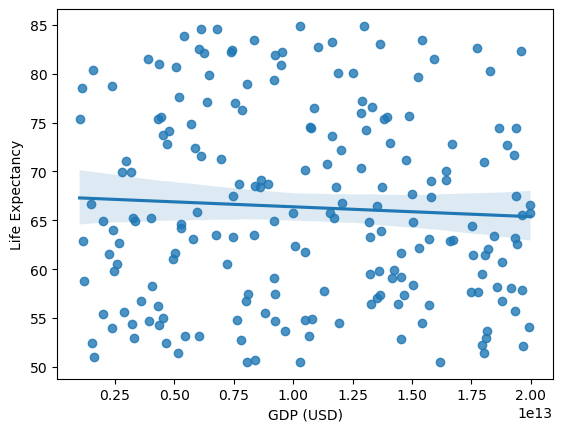

In [8]:
sns.regplot(data=data, x="GDP (USD)", y="Life Expectancy")

**There seems to be no correlation between Life Expectancy and GDP.**

<Axes: xlabel='Population', ylabel='Access to Electricity (%)'>

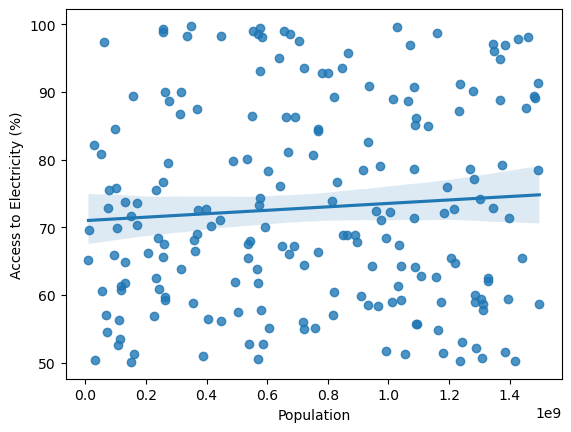

In [9]:
sns.regplot(data=data, x="Population", y="Access to Electricity (%)")

<Axes: xlabel='GDP (USD)', ylabel='Access to Electricity (%)'>

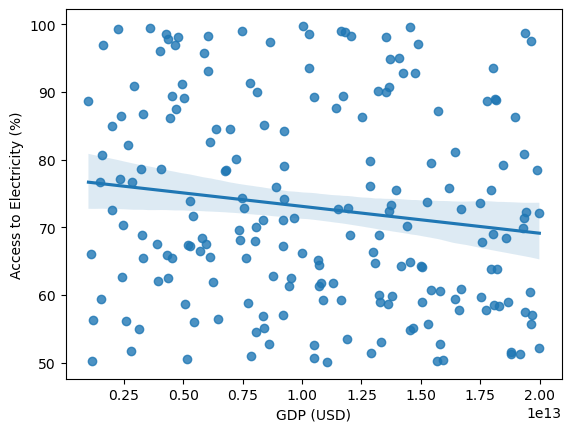

In [10]:
sns.regplot(data=data, x="GDP (USD)", y="Access to Electricity (%)")

<Figure size 2200x1400 with 0 Axes>

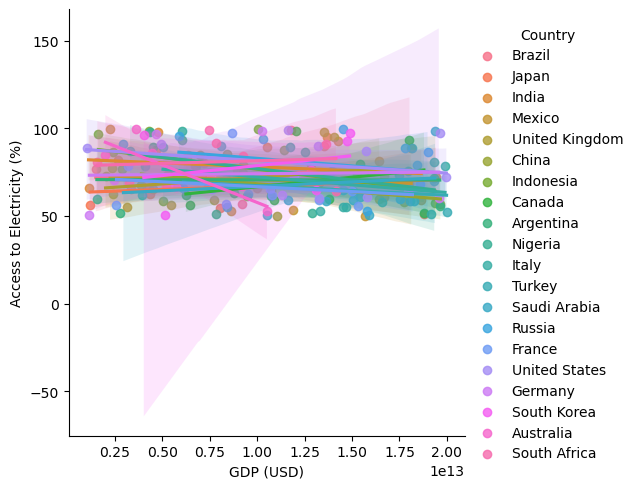

In [11]:
plt.figure(figsize=(22, 14))
sns.lmplot(data=data, x="GDP (USD)", y="Access to Electricity (%)", hue="Country")
plt.show()

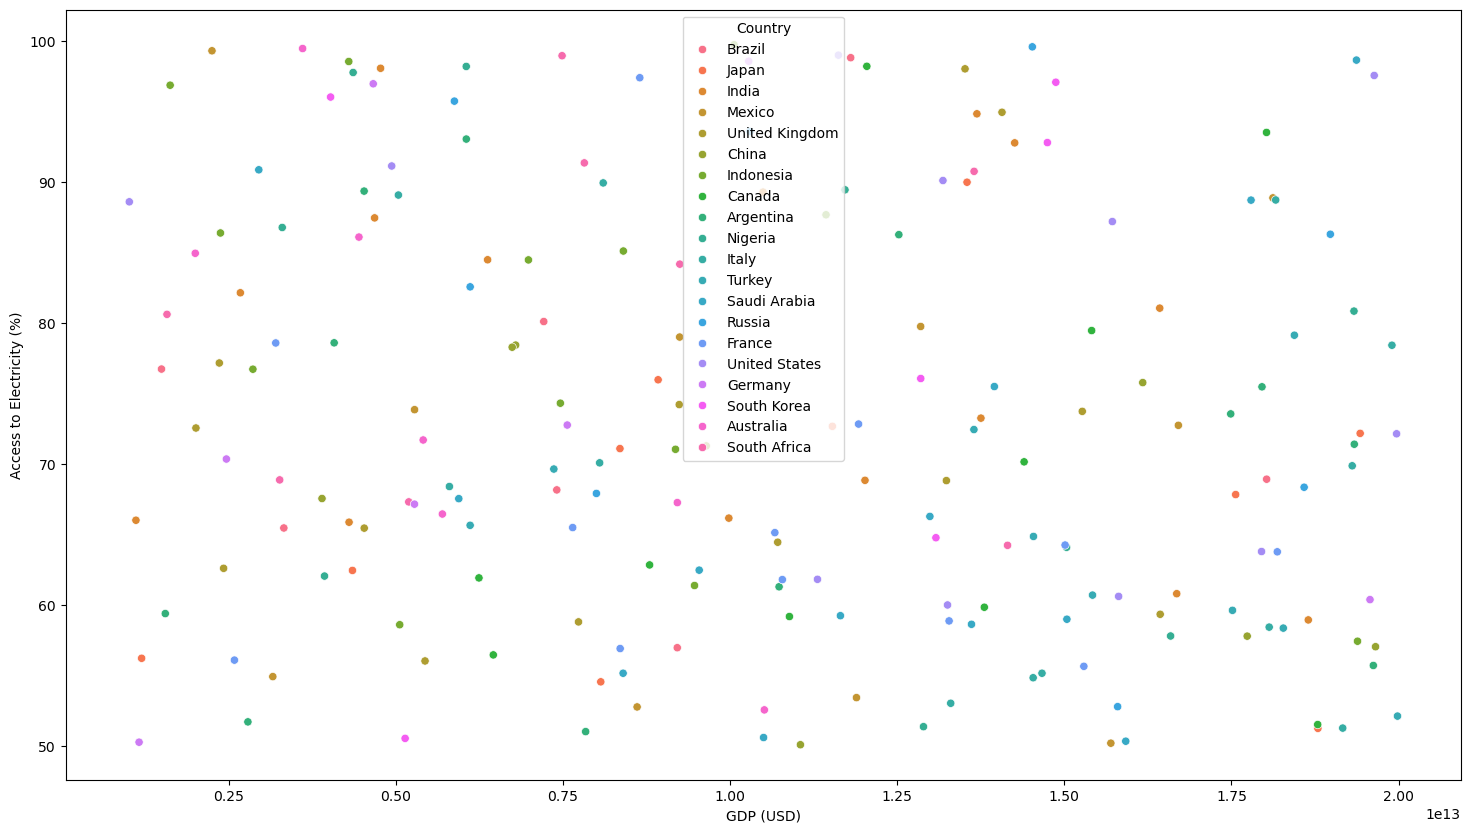

In [12]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=data, x="GDP (USD)", y="Access to Electricity (%)", hue="Country")
plt.show()

<Axes: xlabel='Country', ylabel='GDP (USD)'>

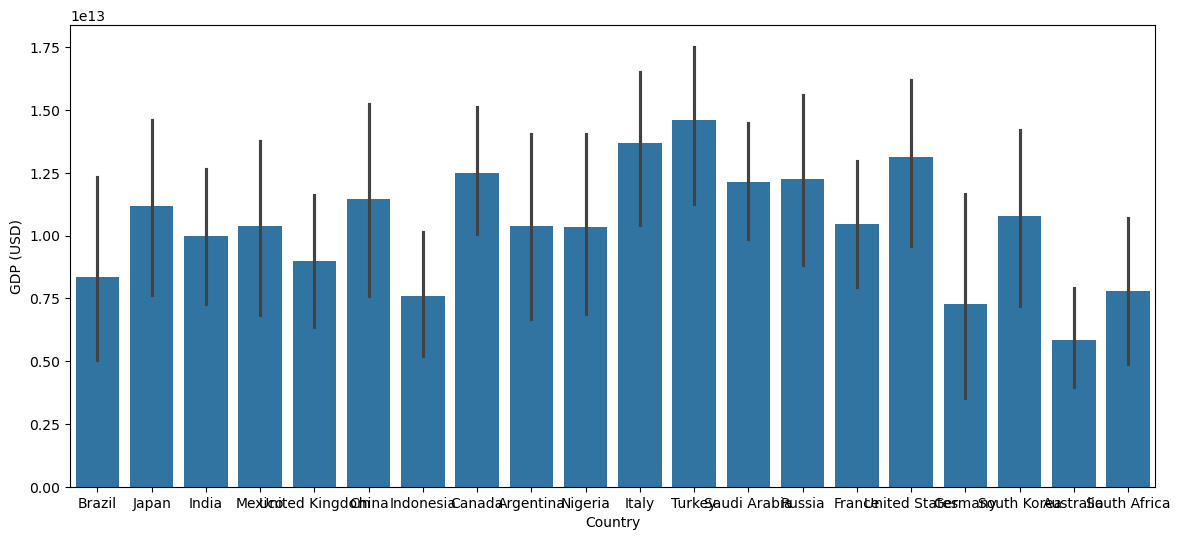

In [13]:
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x="Country", y="GDP (USD)")

**There are differences between countries in terms of income.**

<Axes: xlabel='GDP (USD)', ylabel='CO2 Emissions (metric tons per capita)'>

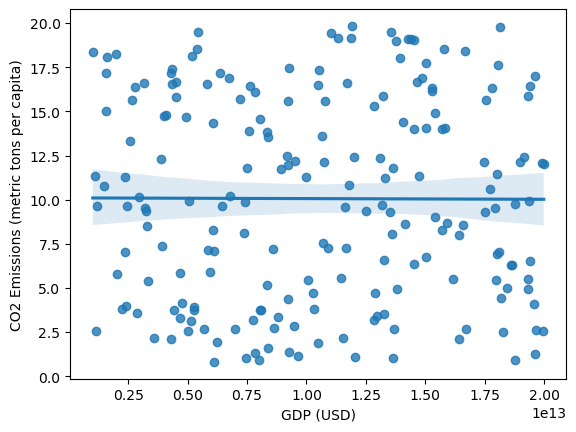

In [14]:
sns.regplot(data=data, x="GDP (USD)", y="CO2 Emissions (metric tons per capita)")

<Axes: >

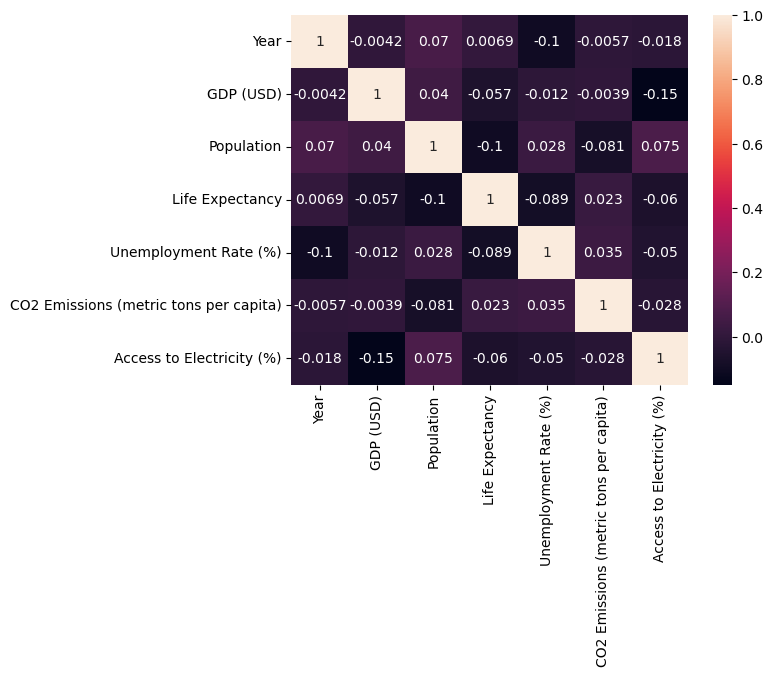

In [15]:
sns.heatmap(data=data.corr(numeric_only=True), annot=True)

**In general, a correlation between the variables could not be reached by visualization. However, different hypothesis tests can be used to detect this situation.**

<Axes: xlabel='Country', ylabel='Life Expectancy'>

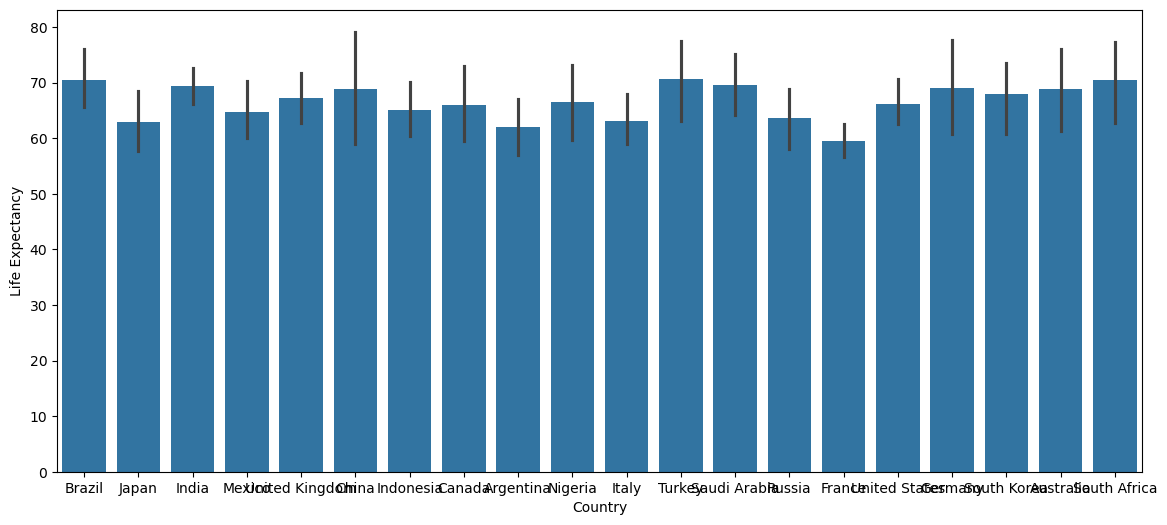

In [16]:
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x="Country", y="Life Expectancy")